In [40]:
import numpy as np
import os
import matplotlib.pyplot as plt

def compute_psnr(volume1, volume2, max_pixel_value=1.0):
    
    mse = np.mean((volume1 - volume2) ** 2)

    if mse == 0:
        return float('inf')
    
    return 20 * np.log10(max_pixel_value / np.sqrt(mse))

In [41]:
def normalize_volume(volume):
    volume[volume < 0] = 0
    # volume = (volume - np.min(volume)) / np.ptp(volume) 
    # volume = volume.astype(np.uint8)

    # volume[volume < 170] = 0

    return volume

In [42]:
root_path = "volumes_benchmark_0"

In [43]:
ref_file = 'ref_au_ag.npy'
ref = np.load(os.path.join(root_path, ref_file))

ref = normalize_volume(ref)

In [51]:
volumes = [f for f in os.listdir(root_path) if (".npy" in f) and f != ref_file]
psnr_dict = {}

for v in volumes:
    v_name = v[:-4]
    vol = np.load(os.path.join(root_path, v))
    
    vol = normalize_volume(vol)
    
    psnr_dict[v_name] = compute_psnr(ref, vol, ref.max())
    print(f"PSNR ({v_name}): {psnr_dict[v_name]} dB")


PSNR (hl_8): 34.056236743927 dB
PSNR (hl_10): 34.131433963775635 dB
PSNR (bs_512): 34.0592098236084 dB
PSNR (oa_leakyrelu): 34.12874698638916 dB
PSNR (1e-3): 34.02066230773926 dB
PSNR (nn_128): 33.98385763168335 dB
PSNR (hl_6): 34.16059970855713 dB
PSNR (oa_none): 34.1792368888855 dB
PSNR (hl_4): 34.242775440216064 dB
PSNR (nn_32): 33.924381732940674 dB
PSNR (hl_12): 34.23486948013306 dB
PSNR (best_params): 34.008145332336426 dB
PSNR (nn_64): 34.11419868469238 dB
PSNR (bs_256): 34.37018394470215 dB
PSNR (oa_relu): 34.27731275558472 dB
PSNR (nn_512): 34.02100086212158 dB
PSNR (1e-4): 34.24032211303711 dB
PSNR (bs_4096): 34.132888317108154 dB
PSNR (au_ag_sirt_reconstruct_tv): 46.56710624694824 dB
PSNR (nn_256): 34.07784461975098 dB
PSNR (bs_2048): 34.19152498245239 dB


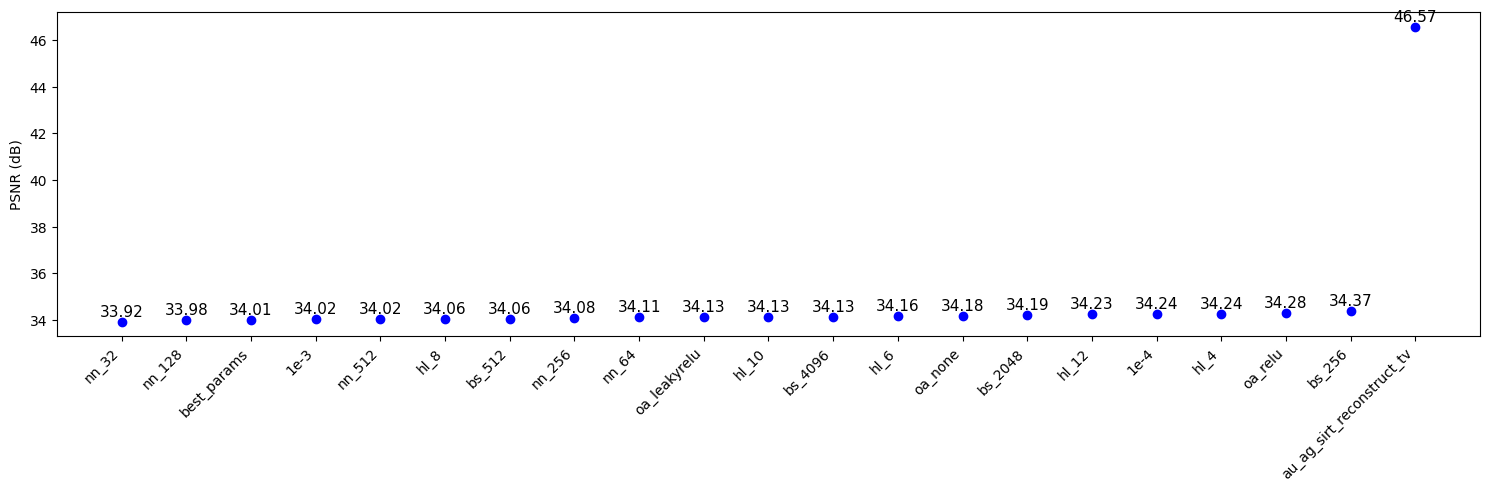

In [52]:
sorted_psnr = dict(sorted(psnr_dict.items(), key=lambda item: item[1]))

values = list(sorted_psnr.values())


plt.figure(figsize=(15, 5))
plt.scatter(sorted_psnr.keys(), values, color='blue')
# plt.xlabel('Model (nb hidden layers)')
plt.ylabel('PSNR (dB)')
plt.xticks(rotation=45, ha='right')

for i, value in enumerate(values):
    plt.text(i, value+0.1, f"{value:.2f}", ha='center', va='bottom', fontsize=11)

plt.tight_layout()
# plt.savefig()